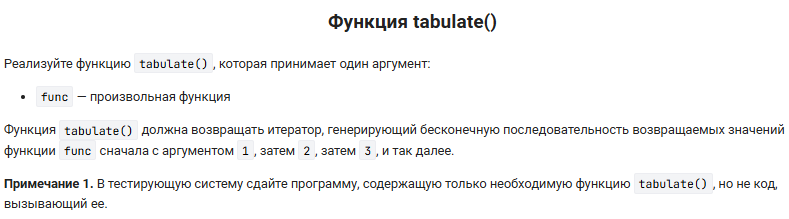

In [16]:
from itertools import repeat, count

def tabulate(func):
    count1 = count(1)
    while True:
        yield next(repeat(func(next(count1))))

func = lambda x: x
values = tabulate(func)

print(next(values))
print(next(values))
print(next(values))

1
2
3


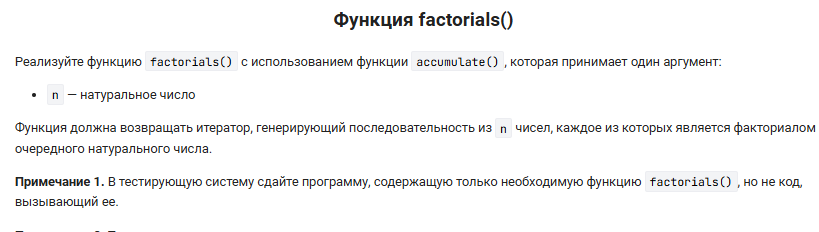

In [17]:
from itertools import accumulate
import operator

def factorials(n):
    return accumulate(range(1,n+1),func=operator.mul)

numbers = factorials(6)

print(*numbers)

1 2 6 24 120 720


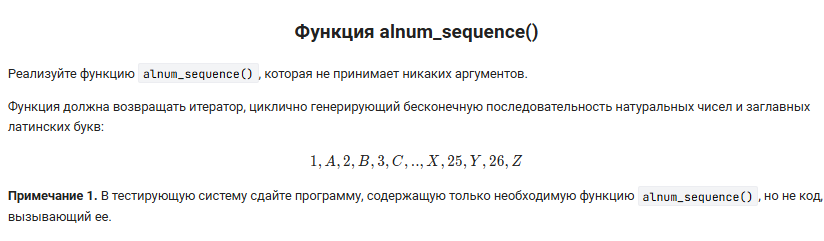

In [18]:
def alnum_sequence():
    while True:
        for num in range(1, 27):
            yield num
            yield chr(num + 64)  # 65 - код буквы 'A'

In [19]:
def roundrobin(*iterables):
    iterators = [iter(it) for it in iterables]
    while iterators:
        next_iterators = []
        for it in iterators:
            try:
                yield next(it)
                next_iterators.append(it)
            except StopIteration:
                # Итерируемый объект завершился, не добавляем его в следующий цикл
                pass
        iterators = next_iterators

print(*roundrobin('abc', 'd', 'ef'))

a d e b f c


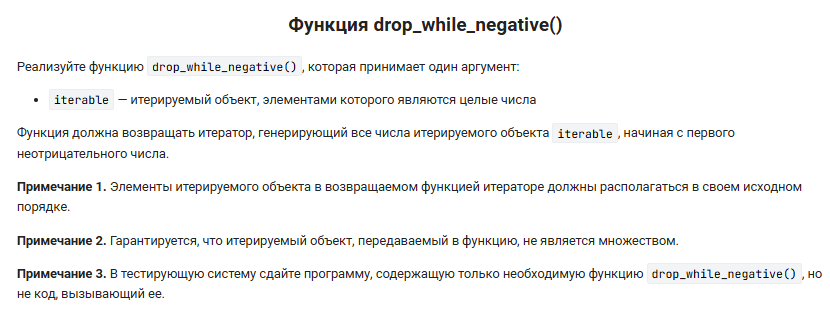

In [20]:
from itertools import dropwhile

def drop_while_negative(iterable):
    return dropwhile(lambda n: n < 0,iterable)

numbers = [-3, -2, -1, 0, 1, 2, 3]

print(*drop_while_negative(numbers))

0 1 2 3


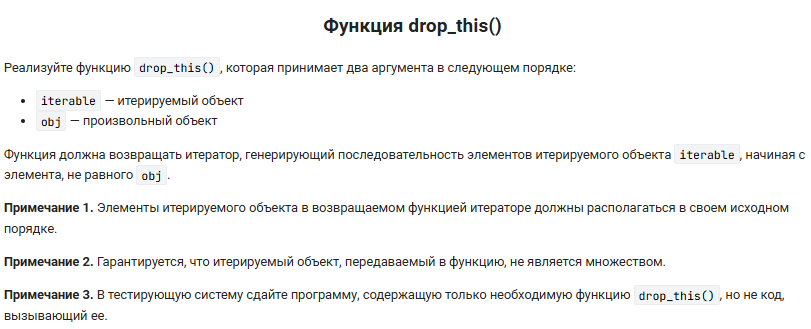

In [21]:
from itertools import dropwhile

def drop_this(iterable,obj):
    return dropwhile(lambda x: x == obj,iterable)

numbers = [0, 0, 0, 1, 2, 3]

print(*drop_this(numbers, 0))

1 2 3


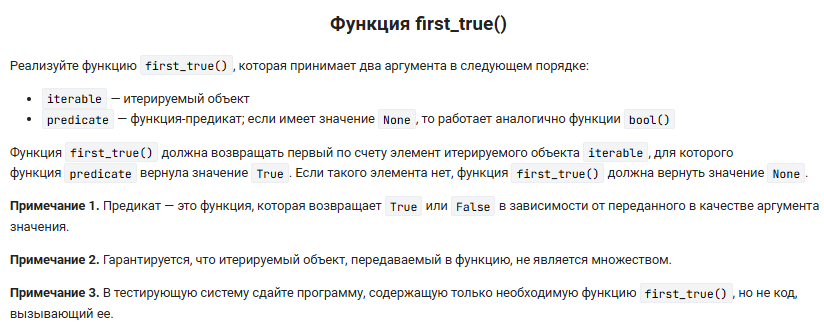

In [22]:
from itertools import takewhile,islice

def first_true(iterable,predicate):
    try:
        res = next(islice(filter(predicate,iterable),1))
    except:
        return None
    return res

numbers = [1, 1, 1, 1, 2, 4, 5, 6]

print(first_true(numbers, lambda num: num % 2 == 0))


2


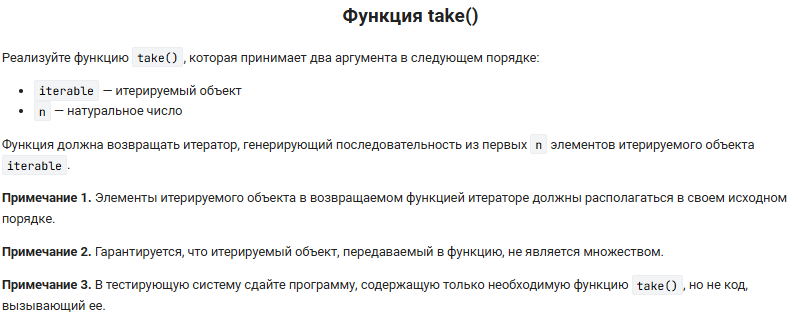

In [23]:
from itertools import islice

def take(iterable,n):
    return islice(iterable,0,n)

print(*take(range(10), 5))

0 1 2 3 4


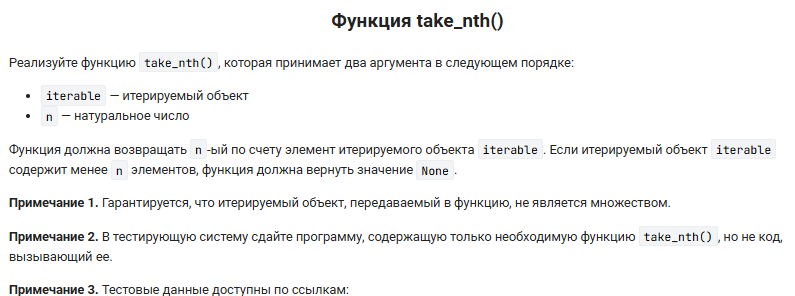

In [24]:
from itertools import islice

def take_nth(iterable,n):
    try:
        res = next(islice(iterable,n-1,n,1))
    except:
        return None
    return res

numbers = [11, 22, 33, 44, 55]

print(take_nth(numbers, 3))

33


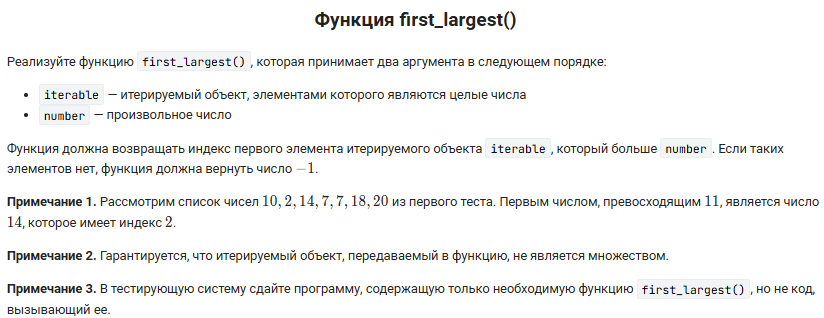

In [25]:
from itertools import dropwhile

def first_largest(iterable,number):
    try:
        res = next(filter(lambda x: x[1] > number,enumerate(iterable,0)))
    except:
        return -1
    return res[0]

numbers = [10, 2, 14, 7, 7, 18, 20]

print(first_largest(numbers, 11))

2


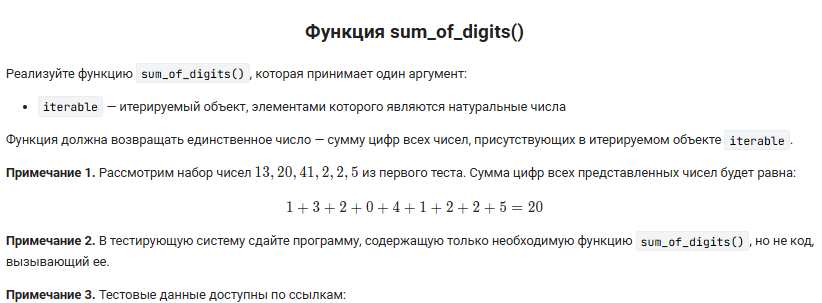

In [26]:
from itertools import chain

def sum_of_digits(iterable):
    return sum(map(int,chain.from_iterable(map(str,iterable))))


print(sum_of_digits((1, 2, 3, 4, 5, 6, 7, 8, 9, 10)))

46


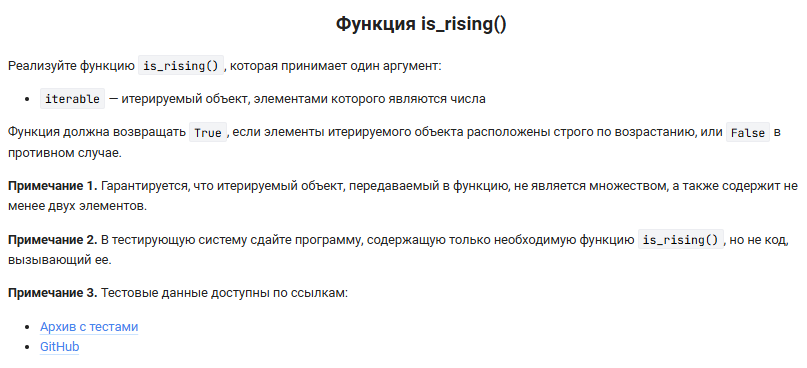

In [27]:
from itertools import pairwise

def is_rising(iterable):
    tuple_iter = pairwise(iterable)
    return all(map(lambda a: a[0] < a[1],tuple_iter))
    



# print(is_rising(iterator))

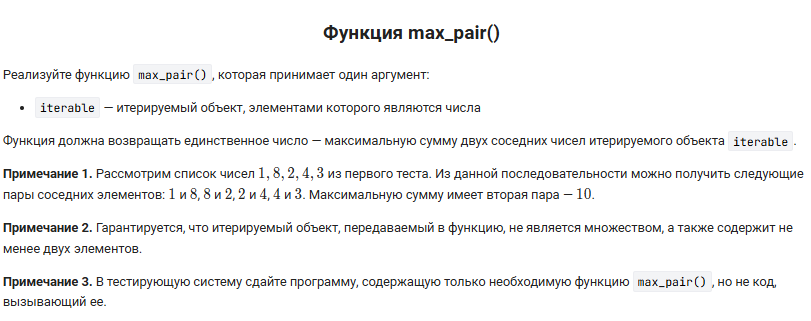

In [28]:
from itertools import pairwise

def max_pair(iterable):
    tuple_iter = pairwise(iterable)
    return max(map(lambda t: t[0] + t[1],tuple_iter))

iterator = iter([1, 2, 3, 4, 5])

print(max_pair(iterator))

9


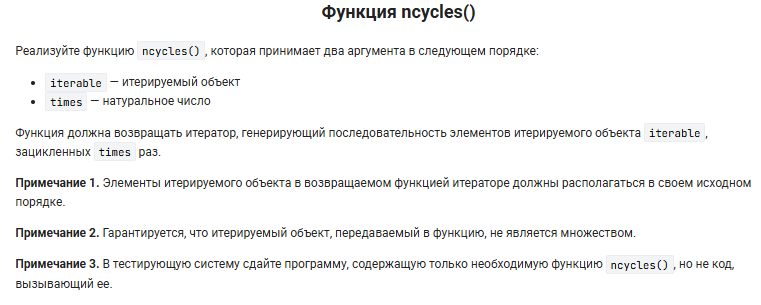

In [29]:
from itertools import tee,chain

def ncycles(iterable,times):
    iters = tee(iterable,times)
    return chain.from_iterable(iters)

print(*ncycles([1, 2, 3, 4], 3))


1 2 3 4 1 2 3 4 1 2 3 4


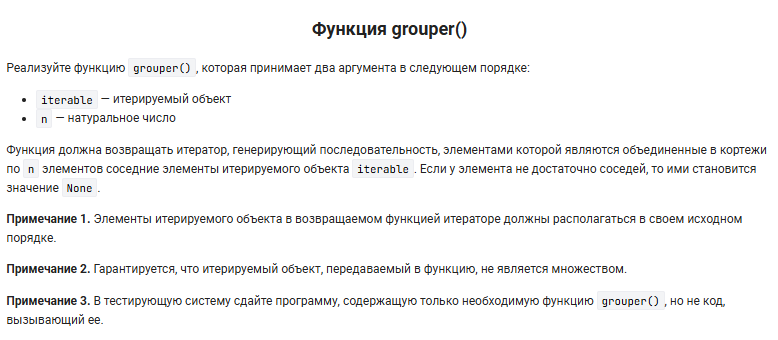

In [39]:
from itertools import zip_longest

def grouper(iterable,n):
    iters = iter(iterable)
    res = zip_longest(*[iters for i in range(n)])
    return res

iterator = iter([1, 2, 3, 4, 5, 6, 7])

print(*grouper(iterator, 3))



(1, 2, 3) (4, 5, 6) (7, None, None)


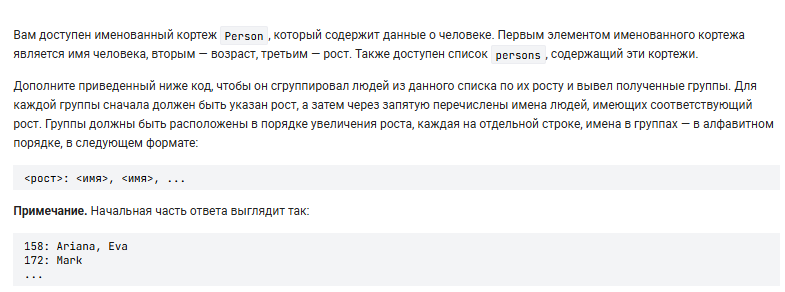

In [11]:
from collections import namedtuple
from itertools import groupby

Person = namedtuple('Person', ['name', 'age', 'height'])

persons = [Person('Tim', 63, 193), Person('Eva', 47, 158),
           Person('Mark', 71, 172), Person('Alex', 45, 193),
           Person('Jeff', 63, 193), Person('Ryan', 41, 184),
           Person('Ariana', 28, 158), Person('Liam', 69, 193)]

res = groupby(sorted(persons,key=lambda p:(p.height,p.name)),key= lambda p: p.height)
for k,value in res:
    names = [p.name for p in value]
    names_str = ', '.join(names)
    print(f'{k}: {names_str}')

158: Ariana, Eva
172: Mark
184: Ryan
193: Alex, Jeff, Liam, Tim


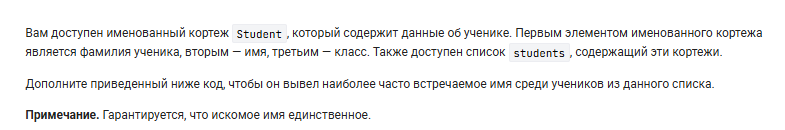

In [20]:
from collections import namedtuple
from itertools import groupby

Student = namedtuple('Student', ['surname', 'name', 'grade'])

students = [Student('Гагиев', 'Александр', 10), Student('Дедегкаев', 'Илья', 11), Student('Кодзаев', 'Георгий', 10),
            Student('Набокова', 'Алиса', 11), Student('Кораев', 'Артур', 10), Student('Шилин', 'Александр', 11),
            Student('Уртаева', 'Илина', 11), Student('Салбиев', 'Максим', 10), Student('Капустин', 'Илья', 11),
            Student('Гудцев', 'Таймураз', 11), Student('Перчиков', 'Максим', 10), Student('Чен', 'Илья', 11),
            Student('Елькина', 'Мария', 11),Student('Макоев', 'Руслан', 11), Student('Албегов', 'Хетаг', 11),
            Student('Щербак', 'Илья', 10), Student('Идрисов', 'Баграт', 11), Student('Гапбаев', 'Герман', 10),
            Student('Цивинская', 'Анна', 10), Student('Туткевич', 'Юрий', 11), Student('Мусиков', 'Андраник', 11),
            Student('Гадзиев', 'Георгий', 11), Student('Белов', 'Юрий', 11), Student('Акоева', 'Диана', 11),
            Student('Денисов', 'Илья', 11), Student('Букулова', 'Диана', 10), Student('Акоева', 'Лера', 11)]

res = groupby(sorted(students,key=lambda p:p.name),key=lambda p: p.name)
saved_data = [(key, list(group)) for key, group in res]

max_result = max(saved_data, key=lambda tpl: len(tpl[1]))
print(max_result[0])

Илья


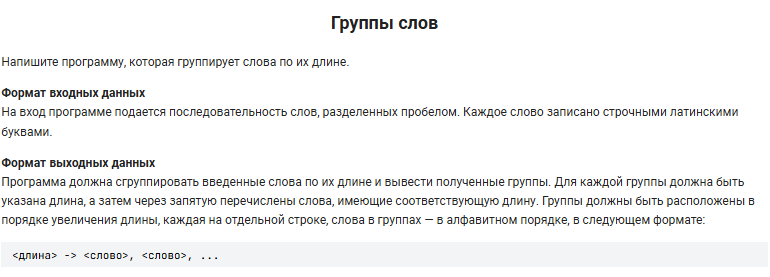

In [26]:
# inp = 'hi never here my blue'
from itertools import groupby


inp = input()
res = groupby(sorted(inp.split(' '),key=lambda x:len(x)),key= lambda x:len(x))
saved_data = [(key, list(group)) for key, group in res]

for k,value in saved_data:
    names_str = ', '.join(sorted(value))
    print(f'{k} -> {names_str}')

2 -> hi, my
4 -> blue, here
5 -> never


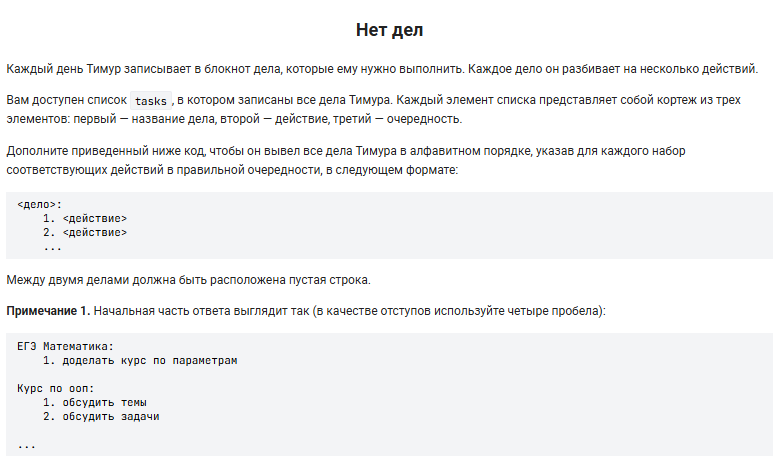

In [12]:
from itertools import groupby

tasks = [('Отдых', 'поспать днем', 3),
        ('Ответы на вопросы', 'ответить на вопросы в дискорде', 1),
        ('ЕГЭ Математика', 'доделать курс по параметрам', 1),
        ('Ответы на вопросы', 'ответить на вопросы в курсах', 2),
        ('Отдых', 'погулять вечером', 4),
        ('Курс по ооп', 'обсудить темы', 1),
        ('Урок по groupby', 'добавить задачи на программирование', 3),
        ('Урок по groupby', 'написать конспект', 1),
        ('Отдых', 'погулять днем', 2),
        ('Урок по groupby', 'добавить тестовые задачи', 2),
        ('Уборка', 'убраться в ванной', 2),
        ('Уборка', 'убраться в комнате', 1),
        ('Уборка', 'убраться на кухне', 3),
        ('Отдых', 'погулять утром', 1),
        ('Курс по ооп', 'обсудить задачи', 2)]

res = groupby(sorted(tasks,key=lambda t: (t[0],t[1],t[2])),key=lambda t: t[0])
saved_data = [(key, list(group)) for key, group in res]

for key,value in saved_data:
    print(f'{key}:')
    s_value = sorted(value,key=lambda t:t[2])
    for v in s_value:
        print(f'\t{v[2]}. {v[1]}')
    print('')

ЕГЭ Математика:
	1. доделать курс по параметрам

Курс по ооп:
	1. обсудить темы
	2. обсудить задачи

Ответы на вопросы:
	1. ответить на вопросы в дискорде
	2. ответить на вопросы в курсах

Отдых:
	1. погулять утром
	2. погулять днем
	3. поспать днем
	4. погулять вечером

Уборка:
	1. убраться в комнате
	2. убраться в ванной
	3. убраться на кухне

Урок по groupby:
	1. написать конспект
	2. добавить тестовые задачи
	3. добавить задачи на программирование



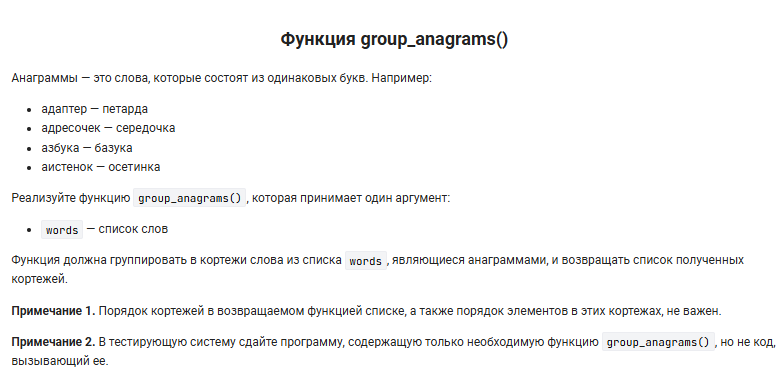

In [25]:
from collections import namedtuple
from itertools import groupby



def group_anagrams(words):
    l = words
    Word = namedtuple('Word',['orig','sor','leng'])
    words = [Word(orig=w,sor=''.join(sorted(w)),leng=len(w)) for w in l]

    res = groupby(sorted(words,key=lambda w:w.sor),key=lambda w:w.sor)
    saved_data = [(key, list(group)) for key, group in res]

    for key,value in saved_data:
        res = [w.orig for w in value]
        yield tuple(res)

groups = group_anagrams(['evil', 'father', 'live', 'levi', 'book', 'afther', 'boko'])

print(*groups)




('father', 'afther') ('book', 'boko') ('evil', 'live', 'levi')


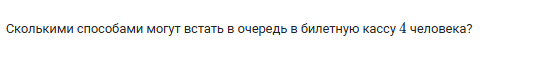

In [2]:
from itertools import permutations

letters = 'abcd'
all_let_permutations = permutations(letters)

print(len(list(all_let_permutations)))

24


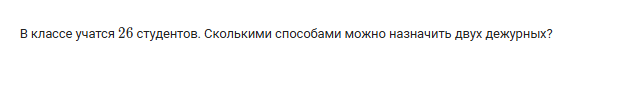

In [2]:
from itertools import combinations

letters = 'qwertyuiopasdfghjklzxcvbnm'
all_let_permutations = combinations(letters,2)

print(len(list(all_let_permutations)))

325


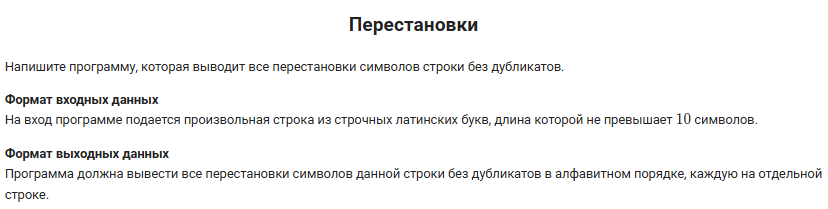

In [19]:
inp = input()

from itertools import permutations
res = [''.join(x) for x in sorted(set(permutations(inp)))]
[print(x) for x in res]

aab
aba
baa


[None, None, None]

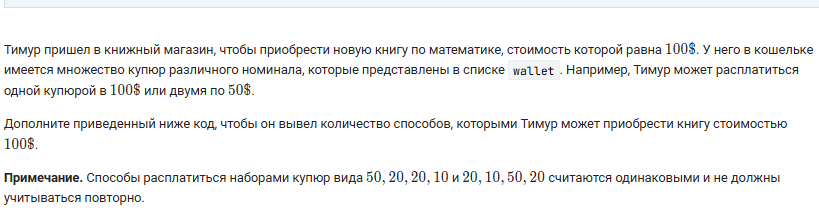

In [26]:
wallet = [100, 100, 50, 50, 50, 50, 20, 20, 20, 10, 10, 10, 10, 10, 5, 5, 1, 1, 1, 1, 1]

from itertools import combinations

counter = 0
for i in range(1,len(wallet) - 1):
    combs = set(sorted(combinations(wallet,i)))
    combs100 = list(filter(lambda x: sum(x) == 100,combs))
    counter += len(combs100)
print(counter)

16


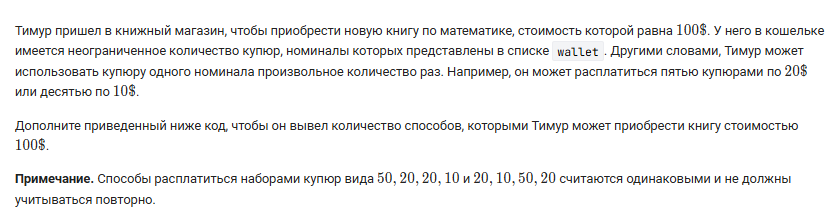

In [27]:
wallet = [100, 50, 20, 10, 5]

from itertools import combinations_with_replacement

counter = 0
for i in range(1,21):
    combs = set(sorted(combinations_with_replacement(wallet,i)))
    combs100 = list(filter(lambda x: sum(x) == 100,combs))
    counter += len(combs100)
print(counter)

50


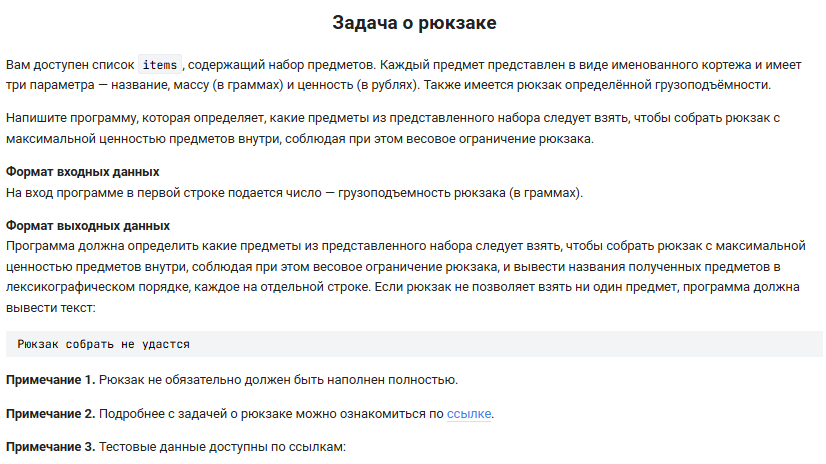

In [37]:
from collections import namedtuple
from itertools import combinations

Item = namedtuple('Item', ['name', 'mass', 'price'])

items = [Item('Обручальное кольцо', 7, 49_000),
         Item('Мобильный телефон', 200, 110_000),
         Item('Ноутбук', 2000, 150_000),
         Item('Ручка Паркер', 20, 37_000),
         Item('Статуэтка Оскар', 4000, 28_000),
         Item('Наушники', 150, 11_000),
         Item('Гитара', 1500, 32_000),
         Item('Золотая монета', 8, 140_000),
         Item('Фотоаппарат', 720, 79_000),
         Item('Лимитированные кроссовки', 300, 80_000)]

def knapsack(capacity):
    max_value = 0
    best_combination = []
    
    # Перебираем все возможные комбинации предметов
    for r in range(1, len(items)+1):
        for combo in combinations(items, r):
            total_mass = sum(item.mass for item in combo)
            total_value = sum(item.price for item in combo)
            
            if total_mass <= capacity and total_value > max_value:
                max_value = total_value
                best_combination = combo
    
    if not best_combination:
        print("Рюкзак собрать не удастся")
    else:
        for name in sorted(item.name for item in best_combination):
            print(name)

# Чтение входных данных
capacity = int(input())
knapsack(capacity)

Золотая монета
Мобильный телефон
Наушники
Обручальное кольцо
Ручка Паркер


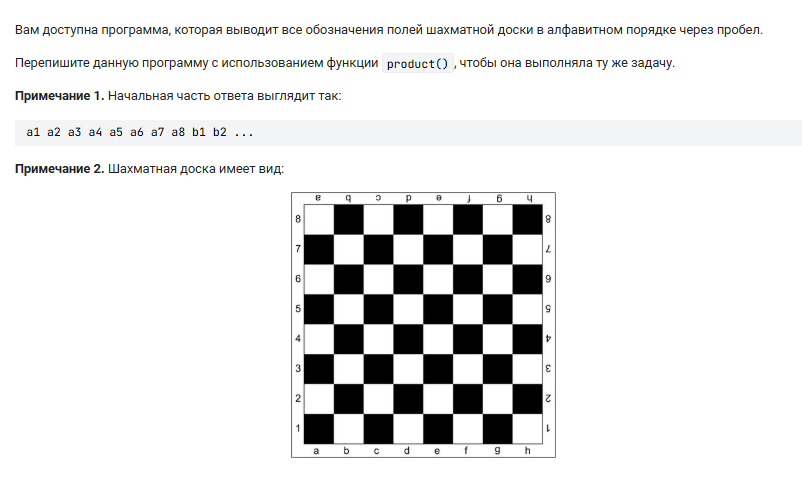

In [45]:
from string import ascii_lowercase
from itertools import product

letters = ascii_lowercase[:8]
digits = [1, 2, 3, 4, 5, 6, 7, 8]

res = product(letters,[str(i) for i in digits])
print(*[''.join(cell) for cell in res])

a1 a2 a3 a4 a5 a6 a7 a8 b1 b2 b3 b4 b5 b6 b7 b8 c1 c2 c3 c4 c5 c6 c7 c8 d1 d2 d3 d4 d5 d6 d7 d8 e1 e2 e3 e4 e5 e6 e7 e8 f1 f2 f3 f4 f5 f6 f7 f8 g1 g2 g3 g4 g5 g6 g7 g8 h1 h2 h3 h4 h5 h6 h7 h8


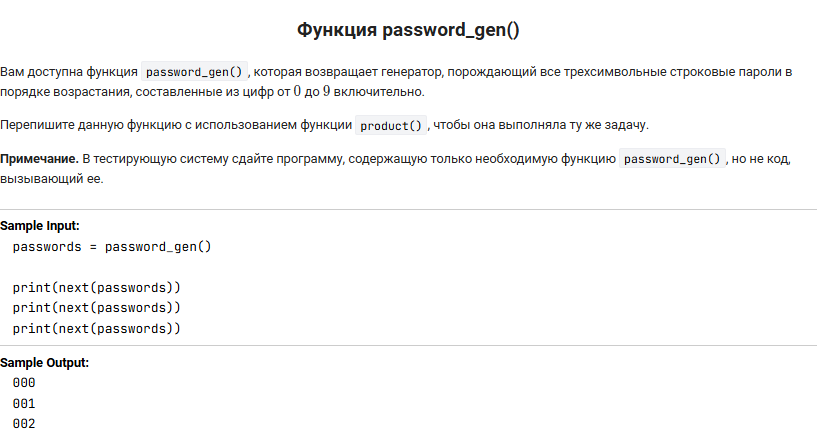

In [ ]:
from itertools import product

def password_gen():
    digs = [str(i) for i in range(0,10)]
    res = map(lambda x: ''.join(x),product(digs,repeat=3))
    return res

passwords = password_gen()

print(next(passwords))
print(next(passwords))
print(next(passwords))

000
001
002
